The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('car_age_price.csv')
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
data.shape

(112, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [ ]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

<Axes: >

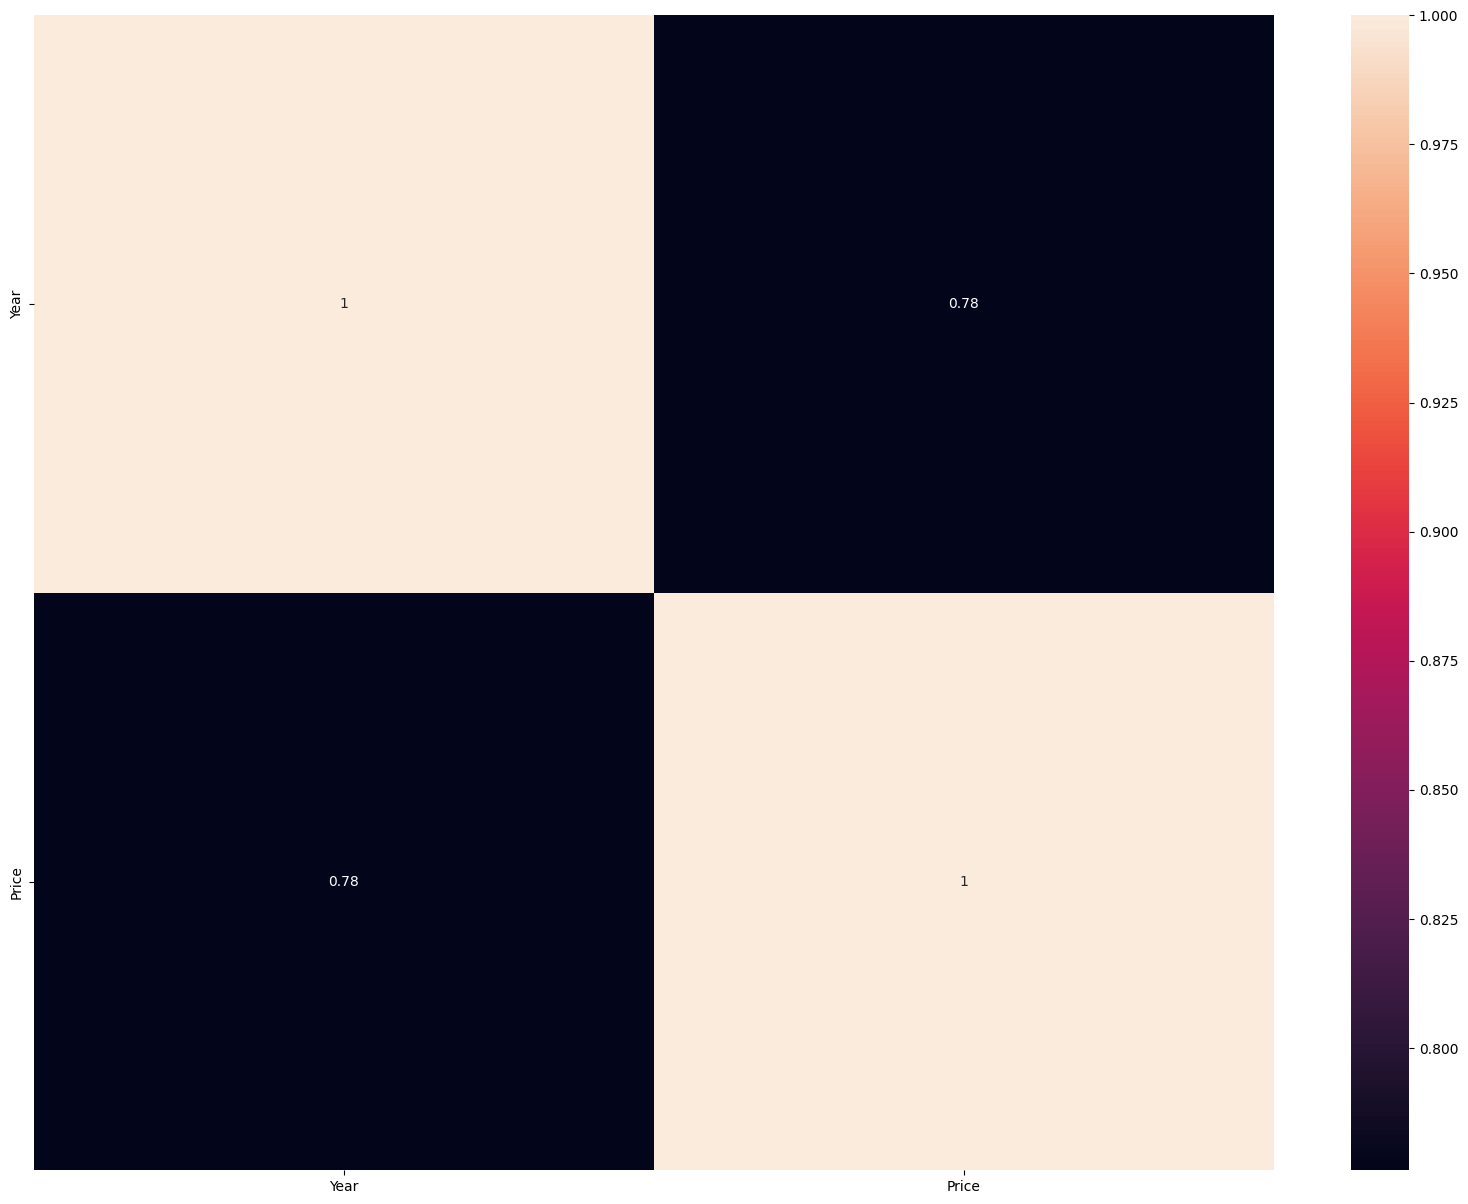

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix,annot=True)

In [ ]:
## standard scaling
from sklearn.preprocessing import StandardScaler
y= data['Price']
x=data.drop('Price',axis=1)

In [ ]:
std=StandardScaler()
x=std.fit_transform(x)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
x=pd.DataFrame(x)

In [ ]:
num_columns = ["Year","Price"]

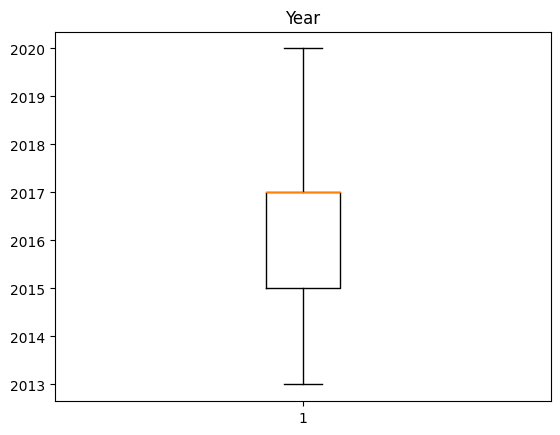

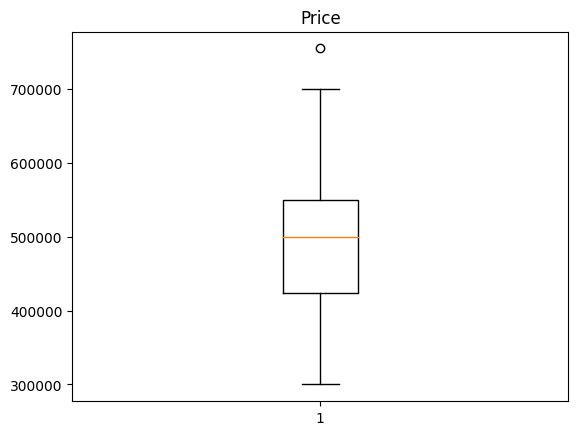

In [ ]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [ ]:
Q1 = np.percentile(data["Price"],25,method="midpoint")
Q2 = np.percentile(data["Price"],50,method="midpoint")
Q3 = np.percentile(data["Price"],75,method="midpoint")

In [ ]:
print("Q1 is",Q1)
print("Q2 is",Q2)
print("Q3 is",Q3)

Q1 is 422500.0
Q2 is 500000.0
Q3 is 550000.0


In [ ]:
IQR = Q3 -Q1


low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)

min is 231250.0
max is 741250.0


In [ ]:
outlier = []
for x in data['Price']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
outlier

[755000]

In [ ]:
ind1 = data["Price"]>up_lim
data.loc[ind1].index

Int64Index([1], dtype='int64')

In [ ]:
data.drop(data.loc[ind1].index,inplace = True)

In [ ]:
data.head(5)

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000


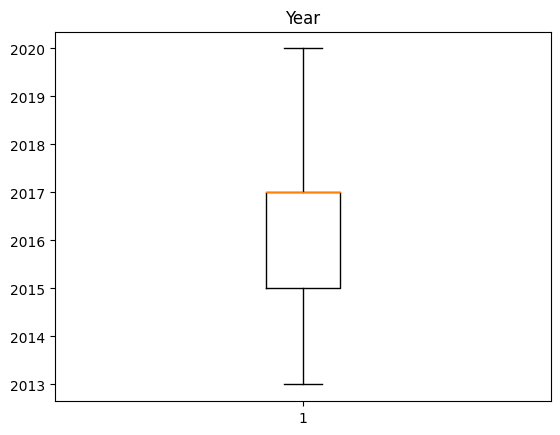

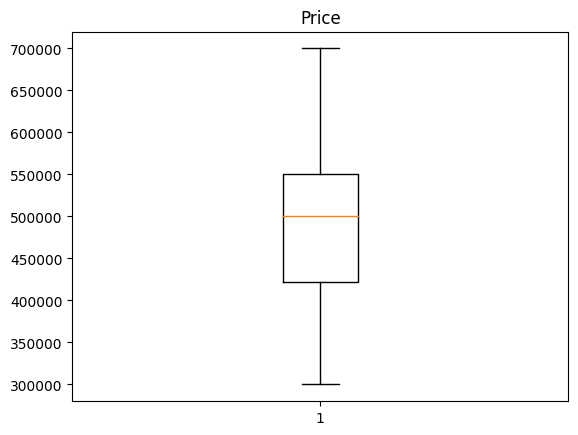

In [ ]:
for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [ ]:
y= data['Price']
x=data.drop('Price',axis=1)

1. Find the best linear relationship between year and
price

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : \n',mean_squared_error(y_test,pred))

MSE is : 
 2718820563.0700393


In [ ]:
print('R2 score is:\n',r2_score(y_test,pred))

R2 score is:
 0.6727697922780109


Can you predict the possible price of a 2022 model second-hand grand i10?

In [ ]:
year_pred = [[2022]]
lr.predict(year_pred).item()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


698523.0518221259

**Another Method**

In [ ]:
display(data)

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [ ]:
df = data.groupby('Year').mean()

In [ ]:
df['Year'] = df.index

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head()

,Price,Year
0,333750.000000,2013
1,380166.666667,2014
2,390454.454545,2015
3,419333.333333,2016
4,523106.361702,2017


In [ ]:
y1= df['Price']
x1=df.drop('Price',axis=1)

In [ ]:
y1

0    333750.000000
1    380166.666667
2    390454.454545
3    419333.333333
4    523106.361702
5    497272.727273
6    561363.636364
7    621250.000000
Name: Price, dtype: float64

In [ ]:
x1

,Year
0,2013
1,2014
2,2015
3,2016
4,2017
5,2018
6,2019
7,2020


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=.25)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [ ]:
model=lr.fit(x_train,y_train)

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : \n',mean_squared_error(y_test,pred))

MSE is : 
 716775925.9437964


In [ ]:
year_pred = [[2022]]
lr.predict(year_pred).item()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


699034.3177562952

Please learn about lasso regression and create a model along with linear
regression

In [ ]:
y1= data['Price']
x1=data.drop('Price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,random_state=42,test_size=.25)

In [ ]:
from sklearn.linear_model import Lasso
# define model
model = Lasso(alpha=1.0)

In [ ]:
# fit model
model.fit(x1,y1)

Lasso()

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is : \n',mean_squared_error(y_test,pred))

MSE is : 
 2463178646.24169


In [ ]:
print('R2 score is:\n',r2_score(y_test,pred))

R2 score is:
 0.7035381918857173


**Find out which one is performing better**

Linear regression has r2 score  0.6727697922780109

Lasso regression has r2 score 0.7035381918857173

r2 score near 1 is better so Lasso regression is performing better